In [94]:
import pandas as pd
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [95]:
df.drop(columns=["Serial No."],inplace=True)

In [96]:
df.shape

(500, 8)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [98]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [99]:
x.shape

(500, 7)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_min=scaler.fit_transform(X_train)
x_test_min=scaler.transform(X_test)

In [102]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [103]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

In [104]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 7)                 56        
                                                                 
 dense_29 (Dense)            (None, 7)                 56        
                                                                 
 dense_30 (Dense)            (None, 7)                 56        
                                                                 
 dense_31 (Dense)            (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])
history=model.fit(x_train_min,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 28ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.0000e+0

In [109]:
pre=model.predict(x_test_min)

4/4 [==============================] - 0s 3ms/step


In [110]:
from sklearn.metrics import r2_score
r2_score(Y_test,pre)

0.8085761970021961

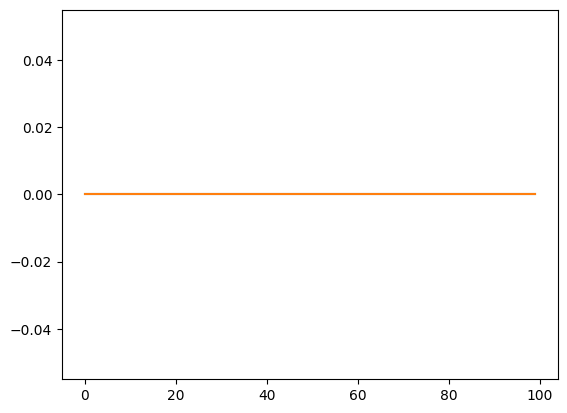

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

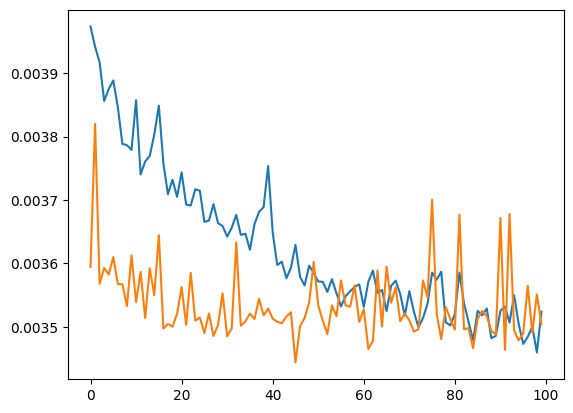

In [112]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])